In [11]:
import pandas as pd

In [30]:
# Analyzing Eating,exercise , habit and body shape 
df = pd.DataFrame(columns = ['Calorie','breakfast','lunch','Dinner','exercise','body_shape'])

In [31]:
df.loc[0]=[1200, 1, 0, 0, 2, 'Skinny']
df.loc[1]=[2800, 1, 1, 1, 1, 'Fat']
df.loc[2]=[3500, 2, 2, 1, 1, 'Skinny']
df.loc[3]=[1400, 0, 1, 0, 3, 'Skinny']
df.loc[4]=[1600, 1, 0, 2, 0, 'Normal']
df.loc[5]=[3200, 1, 2, 1, 1, 'Fat']
df.loc[6]=[1750, 1, 0, 0, 1, 'Skinny']
df.loc[7]=[1600, 1, 0, 0, 0, 'Skinny']


In [32]:
df

,Calorie,breakfast,lunch,Dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Fat
2,3500,2,2,1,1,Skinny
3,1400,0,1,0,3,Skinny
4,1600,1,0,2,0,Normal
5,3200,1,2,1,1,Fat
6,1750,1,0,0,1,Skinny
7,1600,1,0,0,0,Skinny


In [39]:
#split feature vectors and labless
x = df[['Calorie','breakfast','lunch','Dinner','exercise']]
y=df[['body_shape']]

In [40]:
y

,body_shape
0,Skinny
1,Fat
2,Skinny
3,Skinny
4,Normal
5,Fat
6,Skinny
7,Skinny


In [41]:
#rescaling feature vectors to all have the same scale
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)

In [42]:
x_std

array([[-1.11558076,  0.        , -0.90453403, -0.89802651,  0.94387981],
       [ 0.80112175,  0.        ,  0.30151134,  0.53881591, -0.13483997],
       [ 1.6396791 ,  2.        ,  1.50755672,  0.53881591, -0.13483997],
       [-0.87599295, -2.        ,  0.30151134, -0.89802651,  2.02259959],
       [-0.63640513,  0.        , -0.90453403,  1.97565832, -1.21355975],
       [ 1.28029738,  0.        ,  1.50755672,  0.53881591, -0.13483997],
       [-0.45671427,  0.        , -0.90453403, -0.89802651, -0.13483997],
       [-0.63640513,  0.        , -0.90453403, -0.89802651, -1.21355975]])

In [44]:
#covarience matrix of features 
#Feature are column sfrom x_std
import numpy as np
features = x_std.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.14285714  0.71876344  0.99327861  0.50254343 -0.24575647]
 [ 0.71876344  1.14285714  0.34458439  0.4105264  -0.6164113 ]
 [ 0.99327861  0.34458439  1.14285714  0.30944592  0.23231875]
 [ 0.50254343  0.4105264   0.30944592  1.14285714 -0.58123138]
 [-0.24575647 -0.6164113   0.23231875 -0.58123138  1.14285714]]


In [48]:
# eigen vectors and eigen values form cocarience matrix 
eig_vals,eig_vecs = np.linalg.eig(covariance_matrix)
eig_vals

array([3.01956742, 1.6516485 , 0.03371025, 0.26357295, 0.74578659])

In [49]:
eig_vecs

array([[ 0.56071105,  0.29950319, -0.70925815, -0.2910518 ,  0.09023678],
       [ 0.48612116, -0.19712777,  0.14119783,  0.57828695,  0.60866595],
       [ 0.41694888,  0.59540115,  0.6494665 , -0.19844475, -0.10229392],
       [ 0.42190864, -0.26474697, -0.03394036,  0.38195667, -0.77772701],
       [-0.31214751,  0.66846466, -0.23250238,  0.62896887, -0.07784435]])

In [50]:
# reduce deminesions to 1 dimension
eig_vals[0]/sum(eig_vals)

0.5284242993452921

In [51]:
#project datapoint onto selected eigen vector
projected_x = x_std.dot(eig_vecs.T[0])
projected_x

array([-1.67617779,  0.84433369,  2.78962364, -2.34794099,  0.47837313,
        1.61587203, -0.97002437, -0.73405933])

In [61]:
result = pd.DataFrame(projected_x,columns=['PC1'])
result['y_axis'] = 0.0
result['label'] =y

In [62]:
result

,PC1,y_axis,label
0,-1.676178,0.0,Skinny
1,0.844334,0.0,Fat
2,2.789624,0.0,Skinny
3,-2.347941,0.0,Skinny
4,0.478373,0.0,Normal
5,1.615872,0.0,Fat
6,-0.970024,0.0,Skinny
7,-0.734059,0.0,Skinny


In [63]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

Text(0.5,1,'PCA Results')

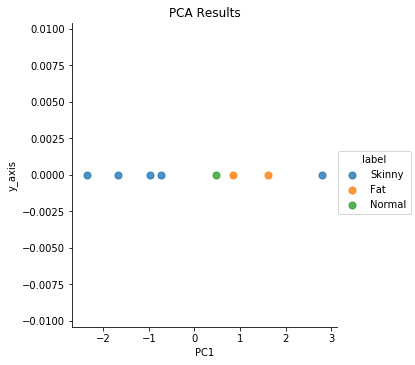

In [67]:
sns.lmplot('PC1','y_axis',data = result ,fit_reg = False , scatter_kws = {"s":50},hue='label')
# title 
plt.title('PCA Results')